In [1]:
%matplotlib inline
import matplotlib


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy import ndimage
import os
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from sklearn.utils import shuffle


In [3]:

# Make car_ directory before running this scrpit 

def get_train(data, pairs_per_model):
    W,H,C = 64,64,3
    images_per_model = 36
    pose_W, pose_H, pose_D = 8,8,36

    total_models = int(data.shape[0] / images_per_model)
    print(total_models)
    data_train = np.zeros((total_models * pairs_per_model, W,H,C))
    
    data_ = np.zeros((total_models * pairs_per_model,W,H,C), dtype=np.uint8)
    labels_ = np.zeros((total_models * pairs_per_model,W,H,C), dtype=np.uint8)
    pose = np.zeros((total_models * pairs_per_model,pose_W,pose_H,pose_D), dtype=np.uint8)
    
    for cnt in range(total_models ):
        tmp_data = np.zeros((images_per_model * images_per_model,W,H,C), dtype=np.uint8)
        tmp_labels = np.zeros((images_per_model * images_per_model,W,H,C), dtype=np.uint8)
        tmp_pose = np.zeros((images_per_model * images_per_model, pose_W,pose_H,pose_D), dtype=np.uint8)
        for i in range(images_per_model):
            for j in range(images_per_model):
                num = (j-i) % images_per_model
                pose_tmp = np.zeros(images_per_model)
                pose_tmp[num] = 1
                tmp_pose[i*images_per_model + j] = np.broadcast_to(pose_tmp,(pose_W,pose_H,pose_D))
                tmp_data[i*images_per_model + j] = data[cnt*images_per_model + i]
                tmp_labels[i*images_per_model + j] = data[cnt *images_per_model + j]         
        rand_nums = np.random.randint(0,images_per_model * images_per_model - 1,pairs_per_model)
        data_[cnt*pairs_per_model : (cnt+1)*pairs_per_model] = tmp_data[rand_nums]
        labels_[cnt*pairs_per_model : (cnt+1)*pairs_per_model] = tmp_labels[rand_nums]
        pose[cnt*pairs_per_model : (cnt+1)*pairs_per_model] = tmp_pose[rand_nums]
        
    data_, labels_, pose = shuffle(data_, labels_, pose, random_state=0)
    print (data_.shape)
    print(labels_.shape)
    print(type(data_[0][0][0][0]))
    return data_, labels_, pose


def save_data(data_, labels_, pose_, dir_name):
    print (dir_name)
    os.mkdir(dir_name)
    datafile = os.path.join(dir_name,"data.npy")
    np.save(datafile, data_)
    posefile = os.path.join(dir_name,"pose.npy")
    np.save(posefile, pose_)
    labelfile = os.path.join(dir_name,"label.npy")
    np.save(labelfile, labels_)

In [4]:
#load data
print ("loading data")
#iterate over directory and get all png images\n
#imageset = np.empty((7704,64,64,3), dtype='float32')
rootdir = '/home/chsarath/kaushal_project/car/3dw'
target_dir = '/home/chsarath/kaushal_project/car_'


def get_image_data(root_dir, target_dir):
    cnt = 0
    total_cnt = 0
    folder_cnt = 50
    cur_sub_dir = 1
    img_data = np.zeros((36*folder_cnt,64,64,3), dtype=np.uint8)
    
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            filepath = subdir + os.sep + file
            if filepath.endswith('.png'):
                #print('check')
                if cnt == 36:
                    cnt = 0
                    total_cnt += 1
                    if total_cnt == folder_cnt:
                        total_cnt = 0
                        sub_dir_name = target_dir + '/batch_' + str(cur_sub_dir)
                        cur_sub_dir += 1
                        data_, labels_, pose_ = get_train(img_data, 100)
                        save_data(data_, labels_, pose_, sub_dir_name)
                        img_data.fill(0)
                cnt += 1
                seq_number = int(filepath.split('-')[-1].split('.')[0])
                img_data[total_cnt*36 + seq_number] = misc.imread(filepath)
                #plt.imshow(cur_model[seq_number]/255)
                #plt.show()
    return


loading data


In [5]:

get_image_data(rootdir, target_dir)


50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_1
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_2
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_3
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_4
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_5
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_6
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_7
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_8
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.uint8'>
/home/chsarath/kaushal_project/car_/batch_9
50
(5000, 64, 64, 3)
(5000, 64, 64, 3)
<class 'numpy.ui

In [6]:
dir = '/home/chsarath/kaushal_project/car_/batch_1'

data = np.load(dir+'/'+'data.npy')
labels = np.load(dir+'/'+'label.npy')
pose = np.load(dir+'/'+'pose.npy')


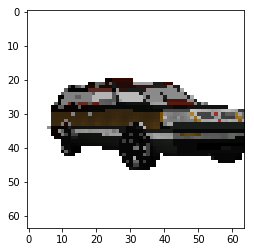

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:

plt.imshow(labels[0]/255)
plt.show()
print(pose[0][0][0])